# Indonesia: Covid19 -- Data cleaning and EDA

In [585]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [587]:
df=pd.read_csv('covid_19_indonesia_time_series_all.csv')    # loading the dataset
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


## Describing the Data for analysis

In [590]:
df.shape

(31822, 38)

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [594]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [596]:
df.skew(numeric_only=True)

New Cases                      15.359818
New Deaths                     18.177717
New Recovered                  13.864441
New Active Cases                4.043376
Total Cases                     7.511810
Total Deaths                    7.149772
Total Recovered                 7.627732
Total Active Cases             12.930230
City or Regency                      NaN
Total Regencies                 5.494520
Total Cities                    5.330543
Total Districts                 5.424614
Total Urban Villages            5.302304
Total Rural Villages            5.275091
Area (km2)                      5.305347
Population                      5.126301
Population Density              5.436276
Longitude                       0.461463
Latitude                        0.009328
New Cases per Million           7.026100
Total Cases per Million         3.163914
New Deaths per Million          8.223681
Total Deaths per Million        1.874968
Total Deaths per 100rb          1.874962
Growth Factor of

In [598]:
(df.isnull().sum()/len(df))*100       # null values percentage in each column

Date                             0.000000
Location ISO Code                0.000000
Location                         0.000000
New Cases                        0.000000
New Deaths                       0.000000
New Recovered                    0.000000
New Active Cases                 0.000000
Total Cases                      0.000000
Total Deaths                     0.000000
Total Recovered                  0.000000
Total Active Cases               0.000000
Location Level                   0.000000
City or Regency                100.000000
Province                         2.919364
Country                          0.000000
Continent                        0.000000
Island                           2.919364
Time Zone                        2.919364
Special Status                  85.676576
Total Regencies                  0.000000
Total Cities                     2.831375
Total Districts                  0.000000
Total Urban Villages             2.840802
Total Rural Villages             2

In [600]:
df.dtypes

Date                            object
Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population               

## Handling missing values

In [603]:
df1=df.drop(columns=['Special Status','City or Regency'])    # removing columns having null values more than  80%

In [605]:
df1[['Province','Island','Time Zone']]=df1[['Province','Island','Time Zone']].fillna('Unknown')   # filling object type columns having null values less than 5% as unknown

In [607]:
# Filling the other numerical columns with their medians as it will not be affected by outliers
df1[['Total Cities','Total Urban Villages','Total Rural Villages','Growth Factor of New Cases','Growth Factor of New Deaths']]=df1[['Total Cities','Total Urban Villages','Total Rural Villages','Growth Factor of New Cases','Growth Factor of New Deaths']].apply(lambda x: x.fillna(x.median()),axis=0)

In [609]:
df1.skew(numeric_only=True)   # the skewness is similar, hence, there is no major shift in data because of filling missing values.

New Cases                      15.359818
New Deaths                     18.177717
New Recovered                  13.864441
New Active Cases                4.043376
Total Cases                     7.511810
Total Deaths                    7.149772
Total Recovered                 7.627732
Total Active Cases             12.930230
Total Regencies                 5.494520
Total Cities                    5.414860
Total Districts                 5.424614
Total Urban Villages            5.386606
Total Rural Villages            5.361533
Area (km2)                      5.305347
Population                      5.126301
Population Density              5.436276
Longitude                       0.461463
Latitude                        0.009328
New Cases per Million           7.026100
Total Cases per Million         3.163914
New Deaths per Million          8.223681
Total Deaths per Million        1.874968
Total Deaths per 100rb          1.874962
Growth Factor of New Cases     24.129051
Growth Factor of

In [611]:
df1.isnull().sum()

Date                           0
Location ISO Code              0
Location                       0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths per Million         0
Total Deat

## Handling the datatypes

In [614]:
# I found three columns to be formatted correctly Date,Case Fatality Rate,Case Recovered Rate
df1['Date']=pd.to_datetime(df1['Date'])

In [616]:
 df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.day

In [618]:
df1['Case Fatality Rate']=df1['Case Fatality Rate'].str.split('%').str[0].str.strip().astype(float)
df1['Case Recovered Rate']=df1['Case Recovered Rate'].str.split('%').str[0].str.strip().astype(float)

In [620]:
df_cleaned=df1
df_cleaned.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level', 'Province',
       'Country', 'Continent', 'Island', 'Time Zone', 'Total Regencies',
       'Total Cities', 'Total Districts', 'Total Urban Villages',
       'Total Rural Villages', 'Area (km2)', 'Population',
       'Population Density', 'Longitude', 'Latitude', 'New Cases per Million',
       'Total Cases per Million', 'New Deaths per Million',
       'Total Deaths per Million', 'Total Deaths per 100rb',
       'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths', 'Year',
       'Month', 'Day'],
      dtype='object')

## Summarizing data using visualizations

1. Yearly Covid Cases,recoveries and deaths

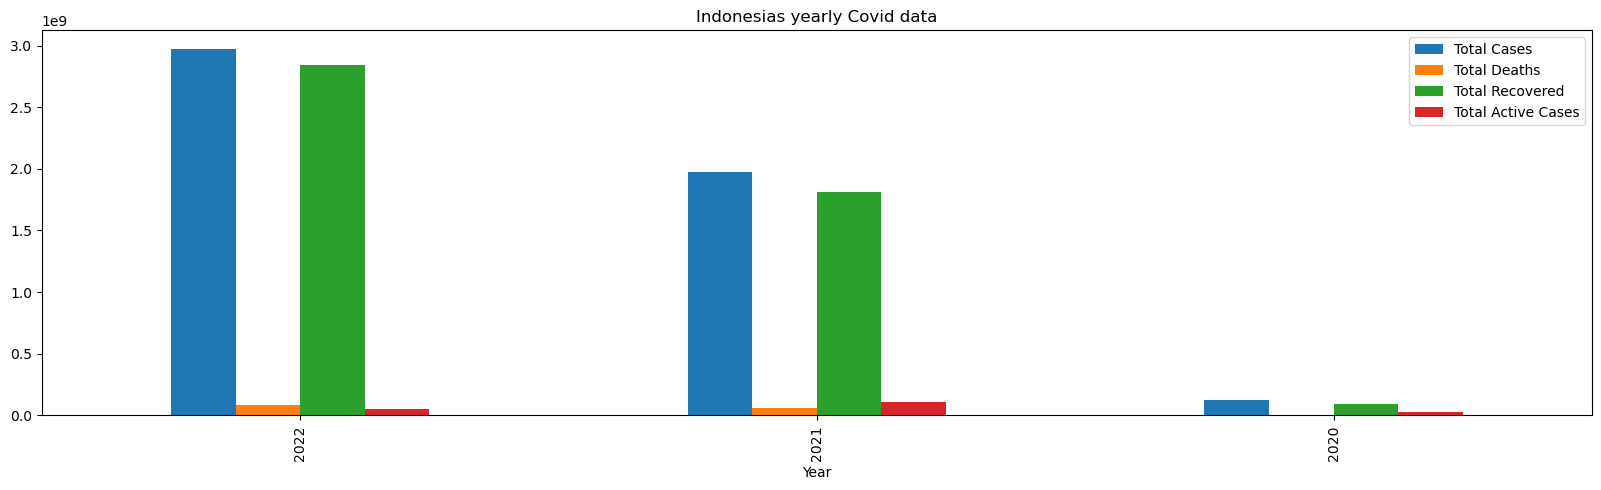

In [624]:
df_filtered.groupby('Year')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().sort_values(by='Total Cases',ascending=False).plot(kind='bar',figsize=(20,5))
plt.title('Indonesias yearly Covid data')
plt.show()

In [625]:
df_cleaned=df_cleaned[df_cleaned['Location']!='Indonesia']   # Removing the rows having Indonesia as a location as its the data of provinces of Indonesia, so there has to be the name of place not the whole country
df_cleaned.shape

(30893, 39)

In [628]:
# Dropping non relevant columns 
df_filtered=df_cleaned.drop(columns=['Longitude','Latitude','New Cases per Million','Total Cases per Million', 'New Deaths per Million','Total Deaths per Million', 'Total Deaths per 100rb'])
df_filtered.shape

(30893, 32)

2. Location wise total active cases.

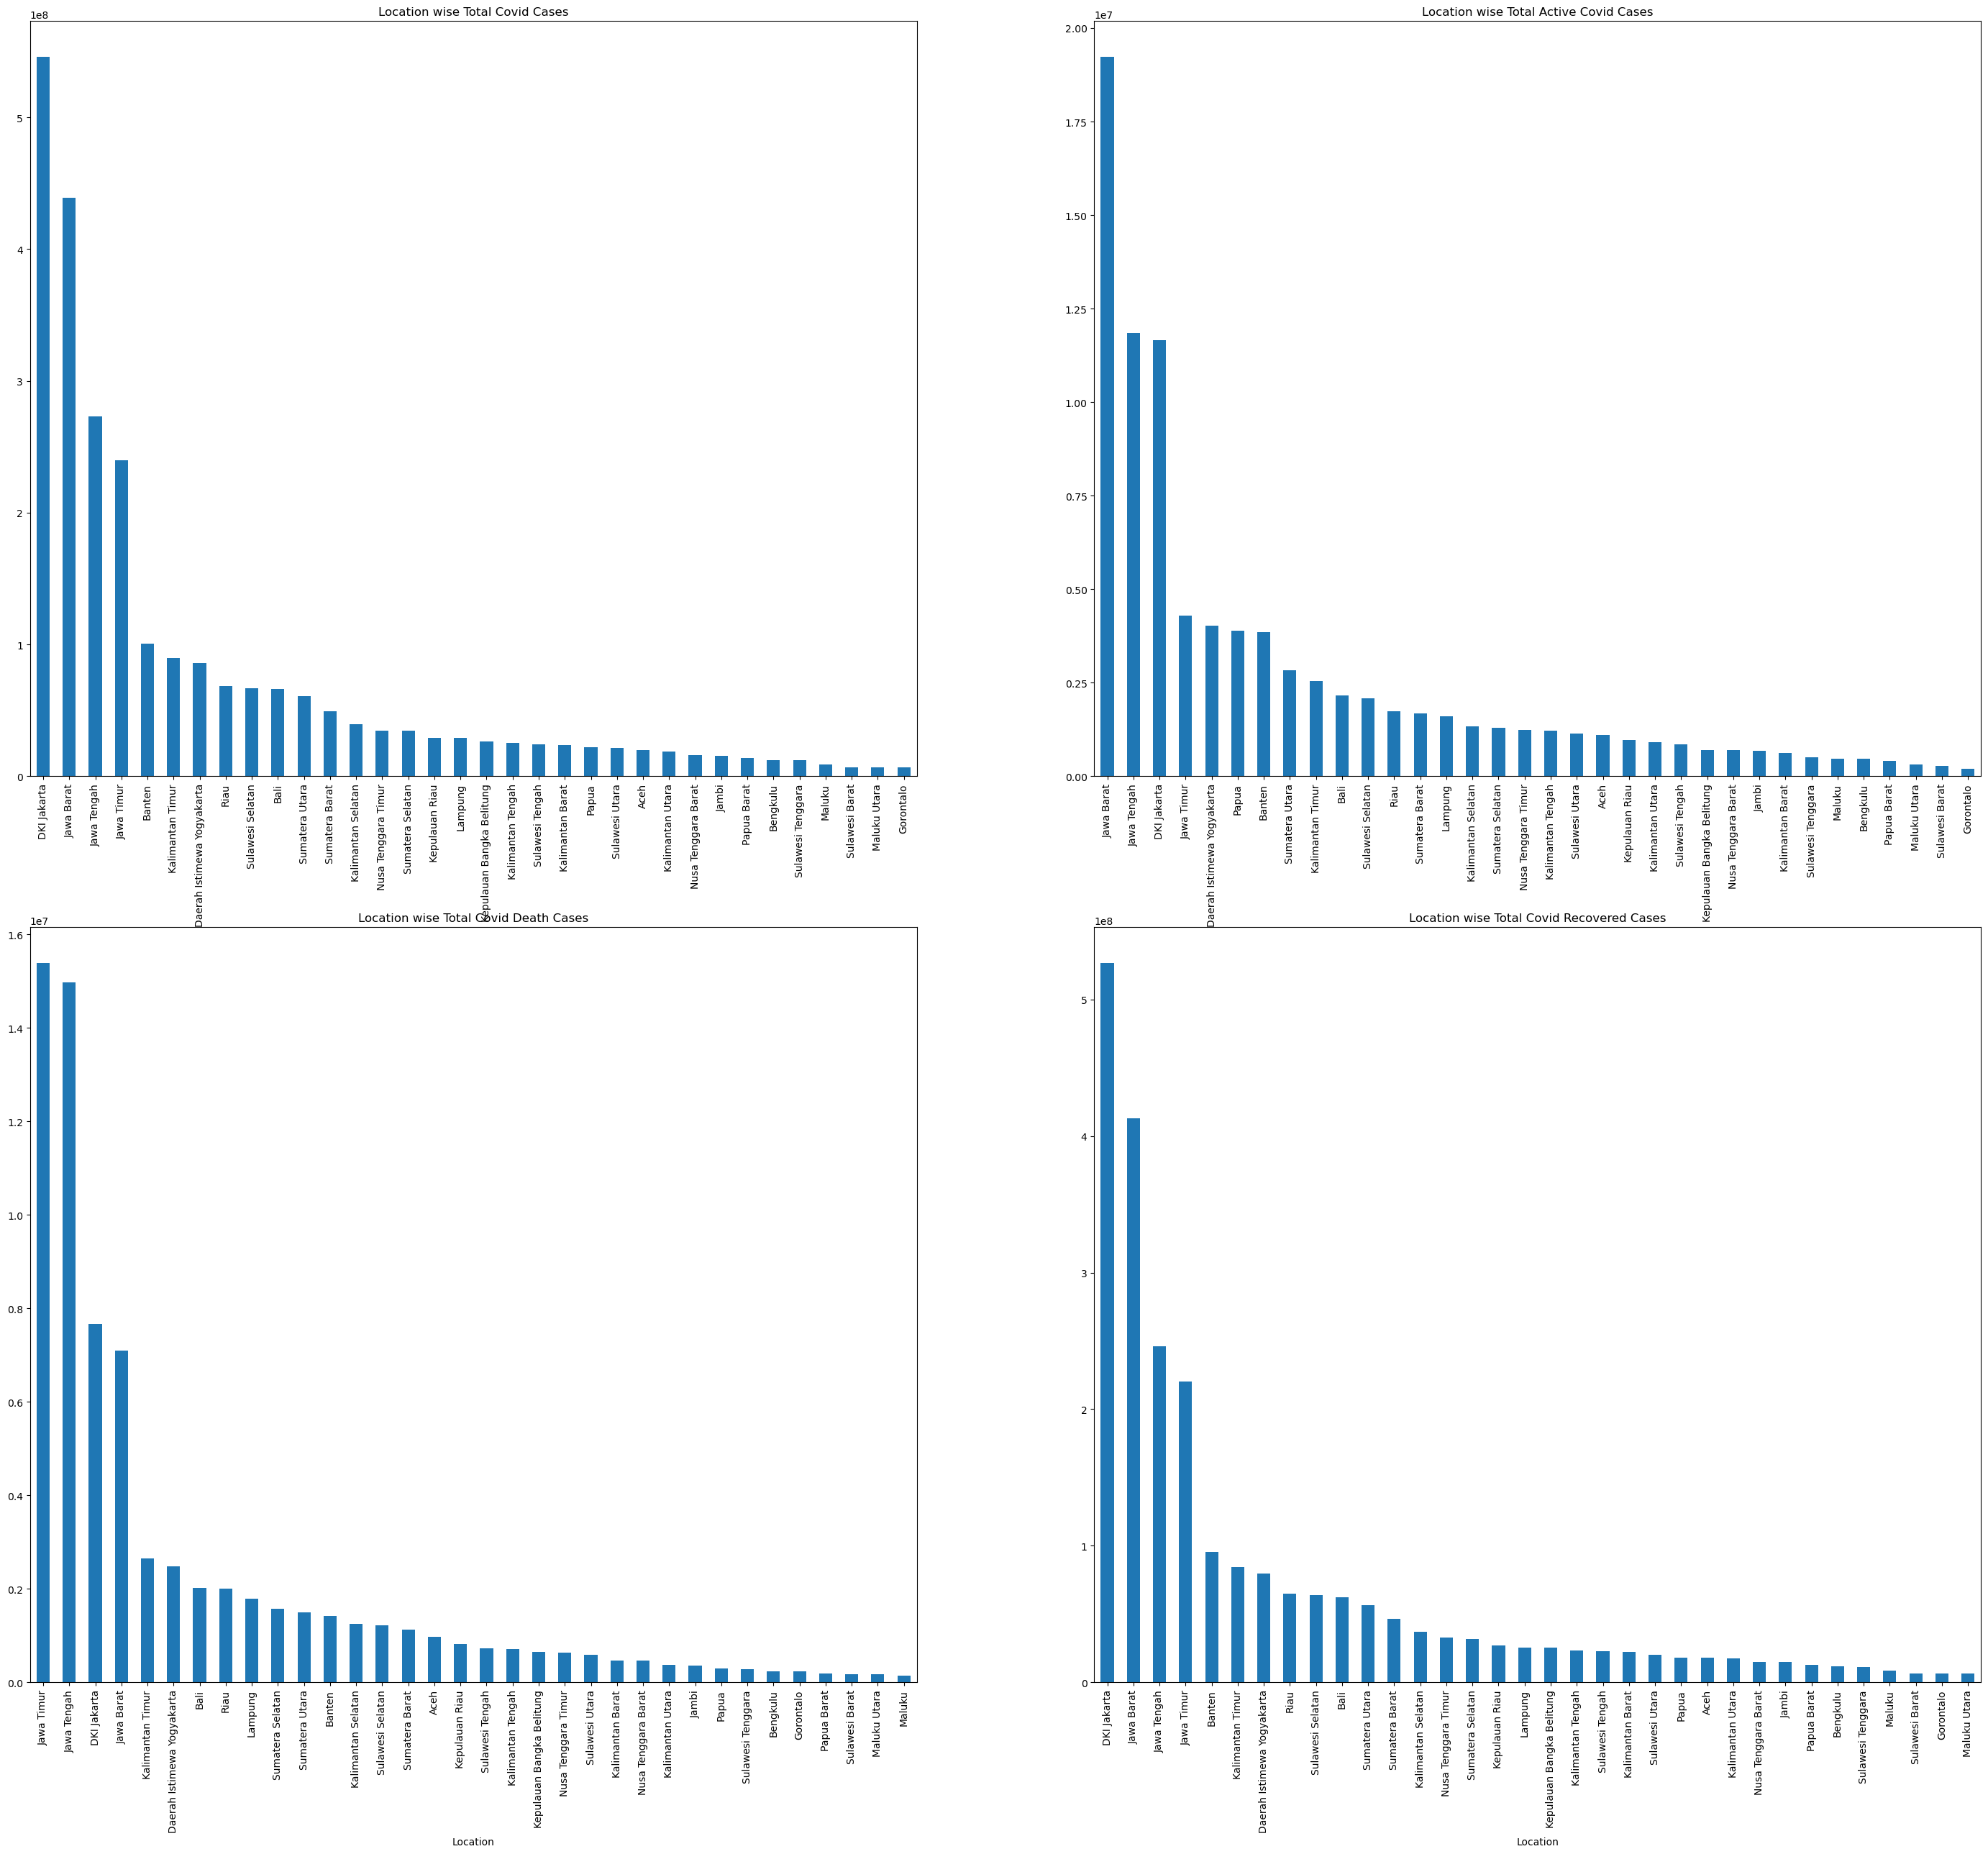

In [631]:
plt.figure(figsize=(35,30))
plt.subplot(2,2,1)
s_df=df_filtered.groupby('Location')['Total Cases'].sum().sort_values(ascending=False)
plt.title('Location wise Total Covid Cases')
s_df.plot(kind='bar')
plt.subplot(2,2,2)
s_df=df_filtered.groupby('Location')['Total Active Cases'].sum().sort_values(ascending=False)
plt.title('Location wise Total Active Covid Cases')
s_df.plot(kind='bar')
plt.subplot(2,2,3)
s_df=df_filtered.groupby('Location')['Total Deaths'].sum().sort_values(ascending=False)
plt.title('Location wise Total Covid Death Cases')
s_df.plot(kind='bar')
plt.subplot(2,2,4)
s_df=df_filtered.groupby('Location')['Total Recovered'].sum().sort_values(ascending=False)
plt.title('Location wise Total Covid Recovered Cases')
s_df.plot(kind='bar')
plt.show()

3. Location and Population density wise total active cases.

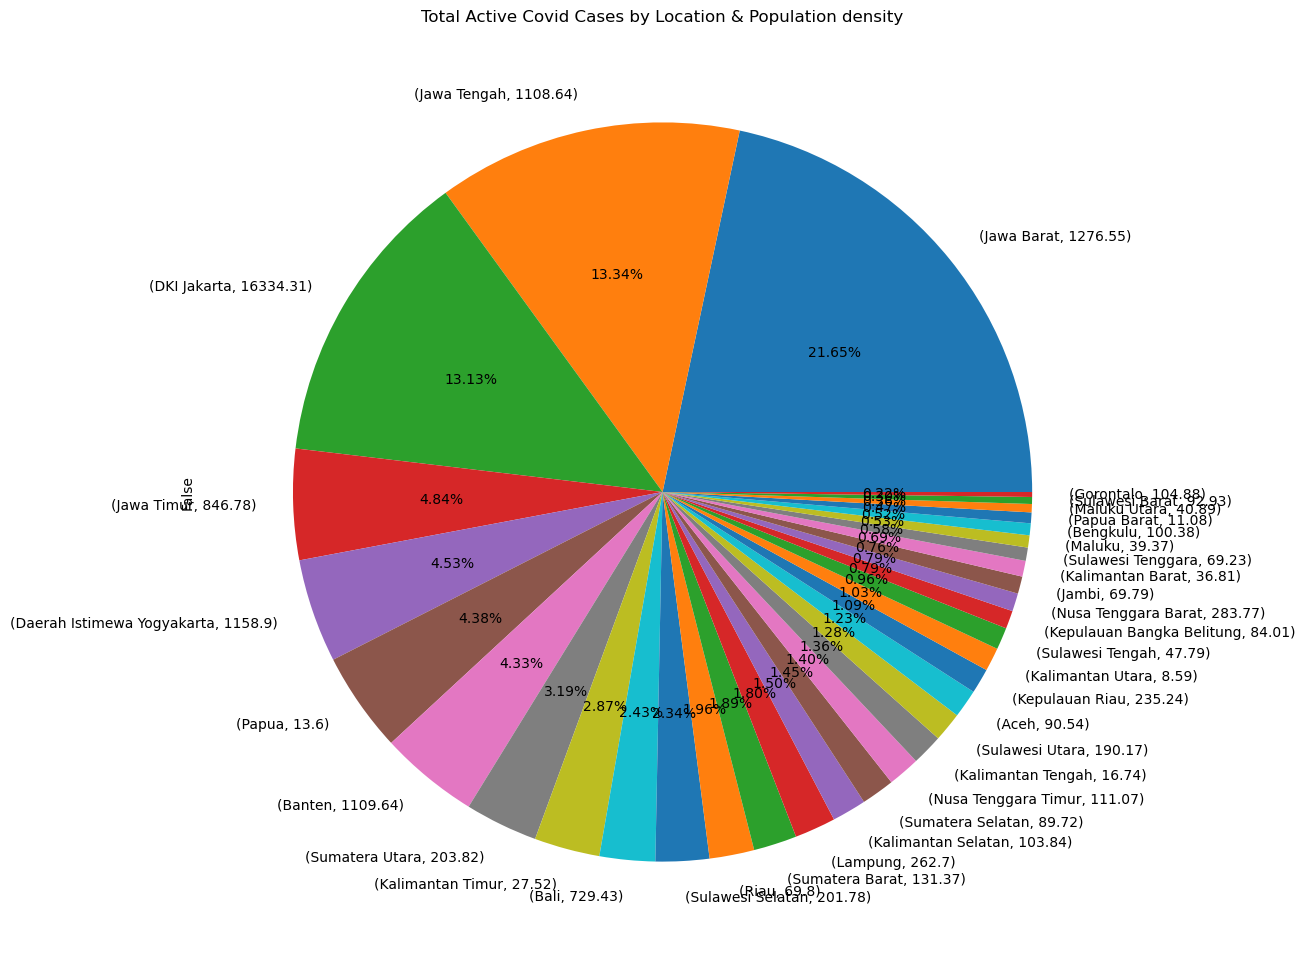

In [633]:
df_filtered.groupby(['Location','Population Density'])['Total Active Cases'].sum().sort_values(ascending=False).plot(kind='pie',label='False',autopct='%.2f%%',figsize=(20,12))
plt.title('Total Active Covid Cases by Location & Population density')
plt.show()

4. Location wise 'Total Cases','Total Deaths','Total Recovered','Total Active Cases'.

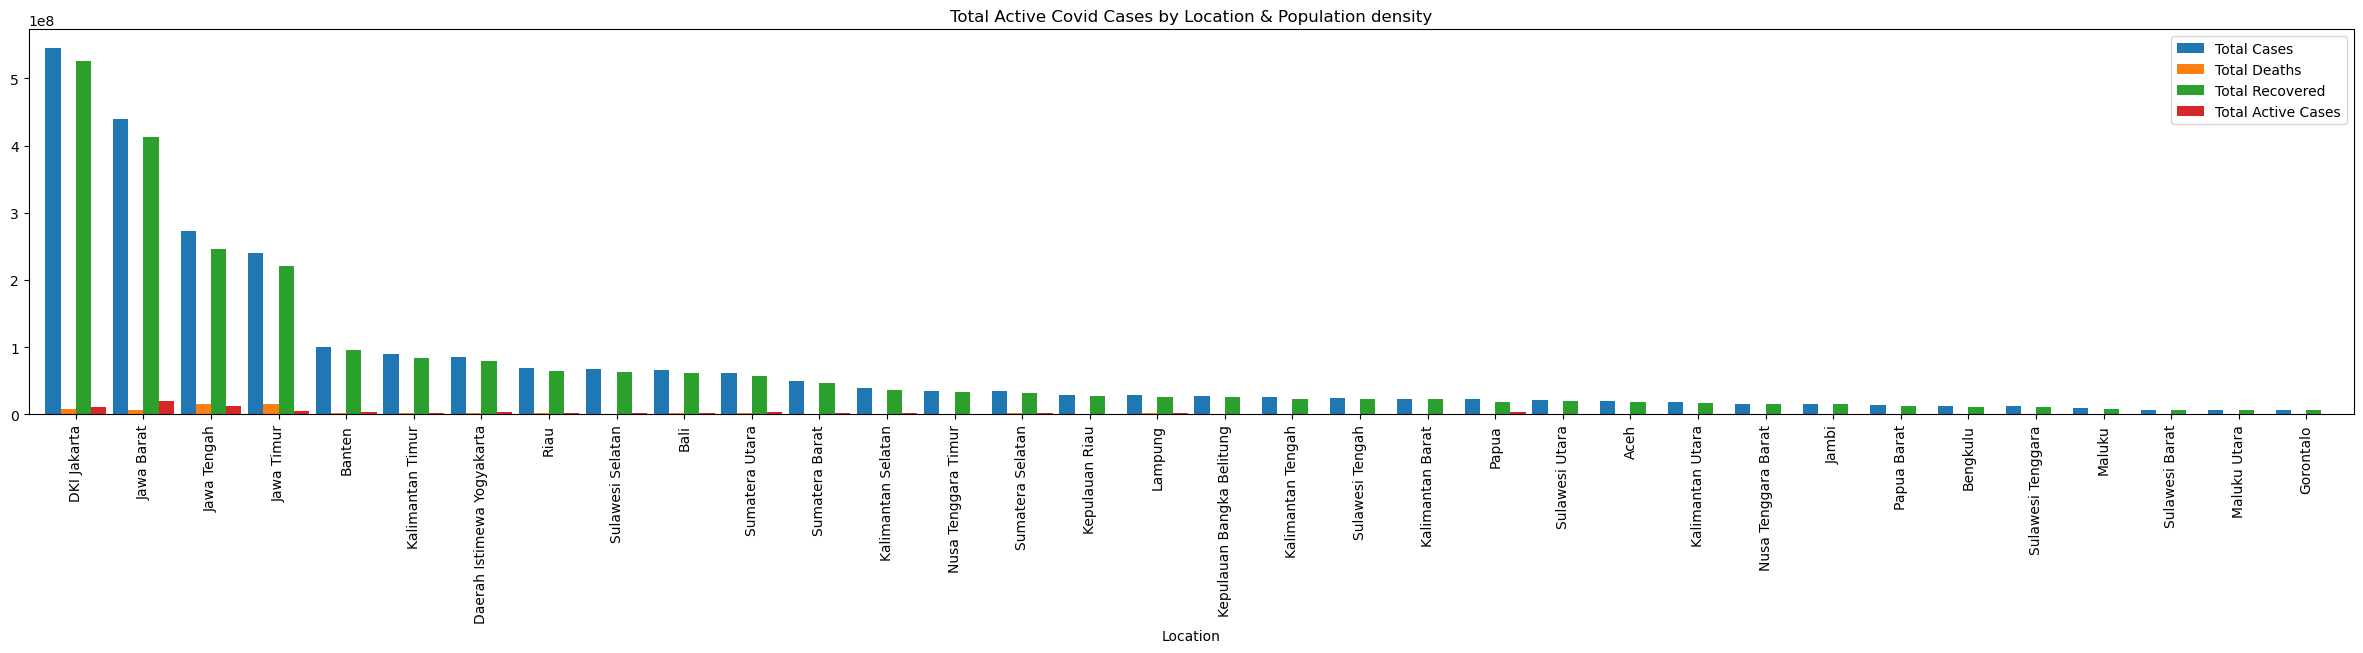

In [635]:
df_filtered.groupby('Location')[['Total Cases','Total Deaths','Total Recovered','Total Active Cases']].sum().sort_values(by='Total Cases',ascending=False).plot(kind='bar',width=0.9,figsize=(30,5))
plt.title('Total Active Covid Cases by Location & Population density')
plt.show()

In [636]:
df_filtered.to_csv('df.csv',index=False)

In [637]:
df_filtered.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level', 'Province',
       'Country', 'Continent', 'Island', 'Time Zone', 'Total Regencies',
       'Total Cities', 'Total Districts', 'Total Urban Villages',
       'Total Rural Villages', 'Area (km2)', 'Population',
       'Population Density', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths', 'Year',
       'Month', 'Day'],
      dtype='object')